In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from hyperopt import hp, fmin, tpe, Trials, space_eval, STATUS_OK
from data_process.data_transform_processor import DataTransformProcessor
from models.model_flow import ModelFlow
# from schema.columns_added_filled import LABEL_COL, NUMERICAL_COLS, CATEGORICAL_COLS, LOG_COLS
# from schema.columns_added import LABEL_COL, NUMERICAL_COLS, CATEGORICAL_COLS, LOG_COLS
from schema.columns_original import LABEL_COL, NUMERICAL_COLS, CATEGORICAL_COLS, LOG_COLS
from models.nn_models.dnn import DNN
from lightgbm import LGBMRegressor
import lightgbm
from sklearn.linear_model import ElasticNet
from models.tree_models.lgbm import LGBM
from models.backtest import BackTest
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Using TensorFlow backend.


In [3]:
df_properties = pd.read_csv('/Users/shuyangdu/Desktop/ZillowChallenge/data/raw_data/properties_2016.csv')
df_train = pd.read_csv('/Users/shuyangdu/Desktop/ZillowChallenge/data/raw_data/train_2016_v2.csv')

/Users/shuyangdu/anaconda/envs/py27/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df_train['transactiondate'].str.split('-', expand=True)[0].values

array(['2016', '2016', '2016', ..., '2016', '2016', '2016'], dtype=object)

In [7]:
df_train.columns

Index([u'parcelid', u'logerror', u'transactiondate'], dtype='object')

In [16]:
idx = df_train['transactiondate'] < '2016-10-01'

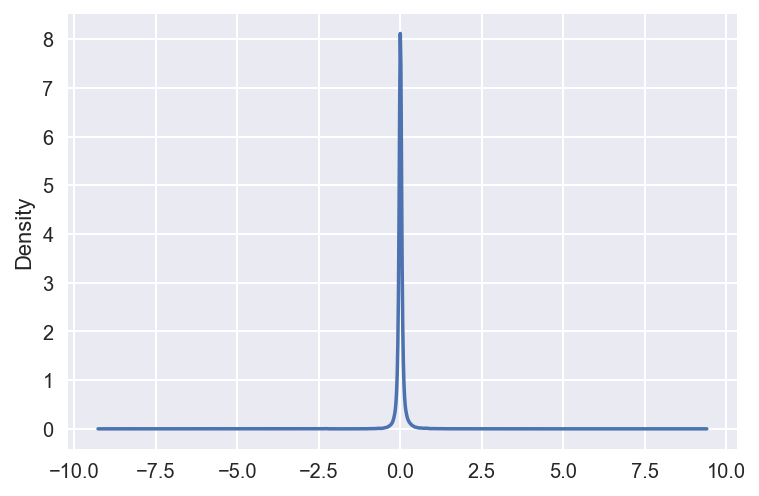

In [19]:
df_train.loc[idx, 'logerror'].plot.density()

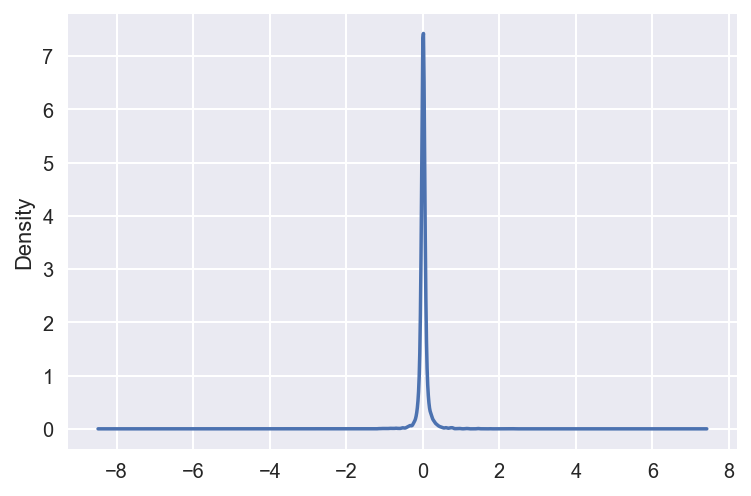

In [20]:
df_train.loc[~idx, 'logerror'].plot.density()

In [2]:
data_pipeline = DataProcessPipeline()

In [7]:
df_merged = data_pipeline.prepare_data(df_properties, df_train)

In [8]:
df_merged.shape

(90275, 61)

In [30]:
df_merged.to_csv('/Users/shuyangdu/Desktop/ZillowChallenge/data/df_merged.csv', index=False)

In [2]:
df_all = pd.read_csv('/Users/shuyangdu/Desktop/ZillowChallenge/data/df_merged.csv')